In [1]:
# f(x) = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
# 1. Определить корни
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает
# 4. Построить график
# 5. Вычислить вершину
# 6. Определить промежутки, на котором f > 0
# 7. Определить промежутки, на котором f < 0

In [2]:
# 1. Представление функции
from sympy import *
from sympy.plotting import plot

x = Symbol ("x")
f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
# f = 2 * x ** 2 + 5 * x - 30
f

In [10]:
# 2. Находим нули функции
print('Нули функции равны:')
roots = solve(f, x) #решения в формате Python
roots = solveset (f,x, S.Reals).evalf(2) #решения в символьном формате
roots

Нули функции равны:


{-1.2}

In [34]:
# Определяем интервалы, где функция возрастает и убывает ('Экстремумы')
extremum_list = [-oo, oo]
extremum_list[1:1] = solve(diff(f), x, S.Reals)
extremum_list

[-oo, (5/54 - sqrt(565)/54, Reals), (5/54 + sqrt(565)/54, Reals), oo]

In [38]:
# 3. Определяем интревалы возрастания и убывания (по методу семинара)

f_diff = [-oo, oo]
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_increasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        incr_list.append(f"[{(f_diff[i - 1]).evalf(2)}, {(f_diff[i]).evalf(2)}]")
    else:
        decr_list.append(f"[{(f_diff[i - 1]).evalf(2)}, {(f_diff[i]).evalf(2)}]")

print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")

Убывает на интервалах:
[-oo, -0.35]
[0.53, oo]
Возрастает на интервалах:
[-0.35, 0.53]


In [39]:
# 3. Определяем интревалы возрастания и убывания (немного изменил код, добавил переменные для вычисления интервалов знакопостоянства)
extremum_list = [-oo, oo]
extremum_list[1:1] = solve(diff(f), x)
increas_intervals =[]
decreas_intervals = []
check_inc=0
check_dec=0
for i in range (1,len(extremum_list)):
    temp = is_increasing(f, Interval.open(extremum_list[i-1], extremum_list[i]))
    if temp:
        increas_intervals.append(f'{(extremum_list[i-1]).evalf(2)},{(extremum_list[i]).evalf(2)}')
    else:
        decreas_intervals.append(f'{(extremum_list[i-1]).evalf(2)},{(extremum_list[i]).evalf(2)}')
if len(increas_intervals)>0:
    print('Функция возрастает на следующих интервалах:')
    for i in range (len(increas_intervals)):
        print (f'({increas_intervals[i]})', end = " ")
        check_inc+=1
    print(f'\n')
else:
    print('Интервалы возрастания отсутствуют')
if len(decreas_intervals)>0:
    print('Функция убываает на следующих интервалах:')
    for i in range (len(decreas_intervals)):
        print (f'({decreas_intervals[i]})', end = " ")
        check_dec+=1
else:
    print('Интервалы убывания отсутствуют')

Функция возрастает на следующих интервалах:
(-0.35,0.53) 

Функция убываает на следующих интервалах:
(-oo,-0.35) (0.53,oo) 

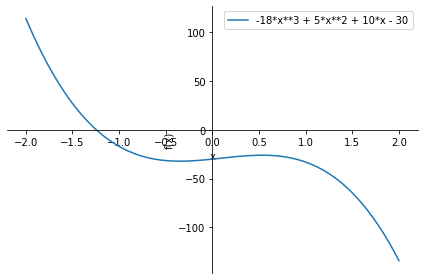

In [10]:
# 4. Строим график
plot(f, (x, -2, 2), legend = True)

In [41]:
# 5. Ищем экстремумы по методу семинара (сходится с Матвеем)
extr = solve(diff(f), x)
count_min = 1
count_max = 1
for i in extr:
    temp = f.subs(x, i).evalf(2)
    if temp < 0:
        print (f"Минимум {count_min} =", temp)
        count_min+=1
    elif temp >0:
        print (f"Максимум {count_max} =", temp)
        count_max+=1         

Минимум 1 = -32.
Минимум 2 = -26.


In [15]:
# 5. Ищем экстремумы (немного изменил код семинара)
extr = solve(diff(f), x)
count_min = 1
count_max = 1
if len(extr) == 0 or (check_inc==0 or check_dec==0):
    print (f"Максимумы и минимумы отсутствуют!")
elif len(extr) == 1:
    temp_1 = f.subs(x, extr[0]+4)
    temp_2 = f.subs(x, extr[0])
    if temp_2 < temp_1:
        print (f"Минимум {count_min}: x = {extr[0].evalf(2)}, y = {temp_2.evalf(2)}")     
    else:
        print (f"Максимум {count_min}: x = {extr[0].evalf(2)}, y = {temp_2.evalf(2)}")
else:
    temp_1 = f.subs(x, extr[1])
    for i in extr:
        temp_2 = f.subs(x, i)
        if temp_2 < temp_1:
            print (f"Минимум {count_min}: x = {i.evalf(2)}, y = {temp_2.evalf(2)}")
            count_min+=1
            temp_1 = temp_2
        elif temp_2 > temp_1:
            print (f"Максимум {count_max}: x = {i.evalf(2)}, y = {temp_2.evalf(2)}")
            count_max+=1
            temp_1 = temp_2

Минимум 1: x = -0.35, y = -32
Максимум 1: x = 0.53, y = -26


In [42]:
# Нахождение интервалов знакопостоянства по методу семинара (некорректная работа)

roots_fun = [-oo, oo]
roots_fun[1:1] = (solve(f, x))

incr_list = []
decr_list = []

for i in range(1, len(roots_fun)):
    num_1, num_2 = roots_fun[i - 1], roots_fun[i]
    val = is_increasing(f, Interval.open(num_1, num_2))
    if val:
        decr_list.append(f"[{num_1}, {num_2}]")
    else:
        incr_list.append(f"[{num_1}, {num_2}]")

print("f > 0:", *incr_list, sep="\n")
print("f < 0:", *decr_list, sep="\n")

f > 0:
[-oo, 5/54 - 565/(972*(-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3]
[5/54 - 565/(972*(-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3, 5/54 - (-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3))]
[5/54 - (-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)), -(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54]
[-(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54, oo]
f < 0:


In [24]:
# Ищем интервал знакопостоянства функции (тоже не работает)
root_f = [-oo, oo]
root_f[1:1] = (solve(f, x))
pos_list = []
neg_list = []

for i in range(1, len(root_f)):
    if root_f[i-1] == -oo:
        num_1 = (root_f[i]-1).evalf(2)
        num_2 = (root_f[i]).evalf(2)
    elif root_f[i] == oo:
        num_1 = (root_f[i-1]).evalf(2)
        num_2 = (root_f[i-1]+1).evalf(2)
    else:
        num_1 = (root_f[i-1]).evalf(2)
        num_2 = (root_f[i]).evalf(2)
    sred = (num_1+num_2)/2
    ask_pos = f.subs(x,sred)
    num_1 = (root_f[i-1]).evalf(2)
    num_2 = (root_f[i]).evalf(2)
    if ask(Q.positive(ask_pos)):
        pos_list.append(f"[{num_1}, {num_2}]")
    else:
        neg_list.append(f"[{num_1}, {num_2}]")

print('Функция больше 0:', *pos_list, sep ='\n')
print('Функция меньше 0:', *neg_list, sep ='\n')

Функция больше 0:
Функция меньше 0:
[-oo, 0.76 + 0.87*I]
[0.76 + 0.87*I, 0.76 - 0.87*I]
[0.76 - 0.87*I, -1.2]
[-1.2, oo]


In [ ]:
# 6. Ищем интервал знакопостоянства функции (правильный метод) y<0
print('Функция меньше 0:', end="")
solveset(f<0,x,Reals).evalf(2)

In [ ]:
# 6. Ищем интервал знакопостоянства функции (правильный метод) y>0
print('Функция больше 0:', end="")
solveset(f>0,x,Reals).evalf(2)